In [1]:
import csv

dataset = []
with open('iris.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) == 5:
            dataset.append(row)

for i in range(len(dataset)):
    dataset[i][0] = float(dataset[i][0])  # Sepal length
    dataset[i][1] = float(dataset[i][1])  # Sepal width
    dataset[i][2] = float(dataset[i][2])  # Petal length
    dataset[i][3] = float(dataset[i][3])  # Petal width

print("Iris dataset loaded successfully!")


Iris dataset loaded successfully!


In [2]:
import math

def mean(values):
    return sum(values) / len(values)

def std_dev(values):
    mu = mean(values)
    variance = sum((x - mu) ** 2 for x in values) / len(values)
    return math.sqrt(variance)

sepal_lengths = [row[0] for row in dataset]
sepal_widths = [row[1] for row in dataset]
petal_lengths = [row[2] for row in dataset]
petal_widths = [row[3] for row in dataset]

for name, values in zip(
    ["Sepal length", "Sepal width", "Petal length", "Petal width"],
    [sepal_lengths, sepal_widths, petal_lengths, petal_widths]
):
    print(f"{name} - Mean: {mean(values):.2f}, Std Dev: {std_dev(values):.2f}")


Sepal length - Mean: 5.84, Std Dev: 0.83
Sepal width - Mean: 3.05, Std Dev: 0.43
Petal length - Mean: 3.76, Std Dev: 1.76
Petal width - Mean: 1.20, Std Dev: 0.76


In [3]:
species = {"Iris-setosa": [], "Iris-versicolor": [], "Iris-virginica": []}

for row in dataset:
    species[row[4]].append(row[:4])

for spec in species:
    spec_data = list(zip(*species[spec]))
    print(f"\nStatistics for {spec}:")
    for name, values in zip(
        ["Sepal length", "Sepal width", "Petal length", "Petal width"],
        spec_data
    ):
        print(f"{name} - Mean: {mean(values):.2f}, Std Dev: {std_dev(values):.2f}")



Statistics for Iris-setosa:
Sepal length - Mean: 5.01, Std Dev: 0.35
Sepal width - Mean: 3.42, Std Dev: 0.38
Petal length - Mean: 1.46, Std Dev: 0.17
Petal width - Mean: 0.24, Std Dev: 0.11

Statistics for Iris-versicolor:
Sepal length - Mean: 5.94, Std Dev: 0.51
Sepal width - Mean: 2.77, Std Dev: 0.31
Petal length - Mean: 4.26, Std Dev: 0.47
Petal width - Mean: 1.33, Std Dev: 0.20

Statistics for Iris-virginica:
Sepal length - Mean: 6.59, Std Dev: 0.63
Sepal width - Mean: 2.97, Std Dev: 0.32
Petal length - Mean: 5.55, Std Dev: 0.55
Petal width - Mean: 2.03, Std Dev: 0.27


Matplotlib is building the font cache; this may take a moment.


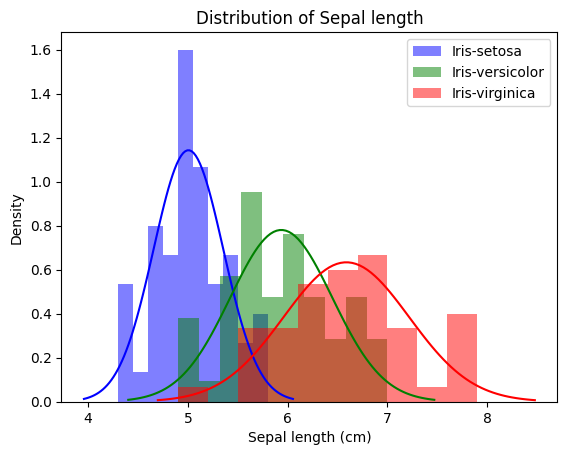

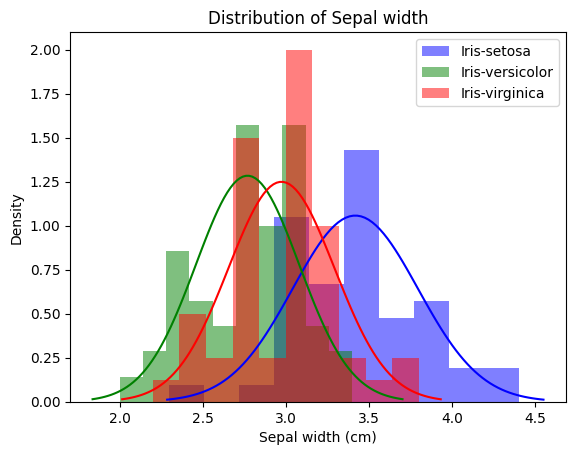

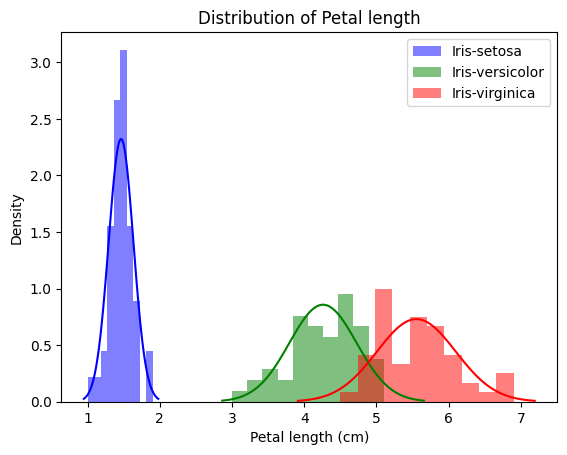

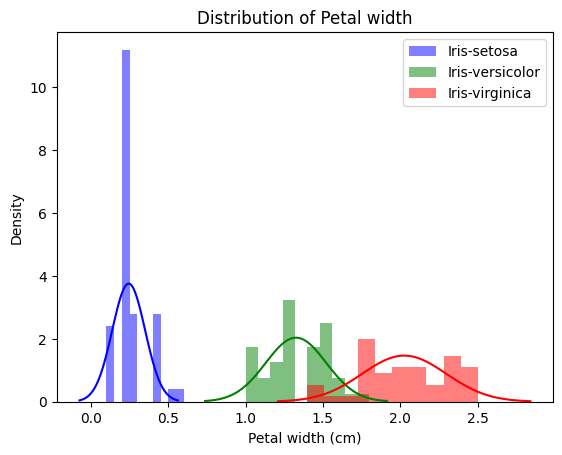

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming you already have the dataset and data grouped by species

# Colors for plotting
colors = ['b', 'g', 'r']

# Labels for the features
features = ["Sepal length", "Sepal width", "Petal length", "Petal width"]

# Loop through each feature
for i, feature_name in enumerate(features):
    plt.figure()  # Create a new figure for each feature
    plt.title(f"Distribution of {feature_name}")

    # Loop through each species
    for (spec, color) in zip(species, colors):
        # Extract the data for the current feature and species
        values = [row[i] for row in species[spec]]
        
        # Plot the histogram of the feature for the species
        plt.hist(values, density=True, alpha=0.5, color=color, label=spec)

        # Plot the normal distribution curve (bell curve)
        mu = mean(values)
        sigma = std_dev(values)
        x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        plt.plot(x, norm.pdf(x, mu, sigma), color=color)

    plt.xlabel(f"{feature_name} (cm)")
    plt.ylabel("Density")
    plt.legend()  # Show the legend
    plt.show()  # Display the plot


In [ ]:
import json

with open('bikes.json') as f:
    bikes_data = json.load(f)

print("Citybik.es dataset loaded successfully!")


In [5]:
active_stations = [station for station in bikes_data['network']['stations'] if station['extra']['status'] == 'online']
print(f"Number of active stations: {len(active_stations)}")


Number of active stations: 1


In [10]:
total_bikes = sum(station['free_bikes'] for station in bikes_data['network']['stations'])
total_docks = sum(station['empty_slots'] for station in bikes_data['network']['stations'])

print(f"Total available bikes: {total_bikes}")
print(f"Total free docks: {total_docks}")


Total available bikes: 95
Total free docks: 57


In [11]:
from math import cos, acos, sin, radians

def distance_coords(lat1, lng1, lat2, lng2):
    R = 6378100
    lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    return R * acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lng1 - lng2))

target_lat, target_lng = 45.074512, 7.694419
closest_station = None
min_distance = float('inf')

for station in bikes_data['network']['stations']:
    if station['free_bikes'] > 0:
        distance = distance_coords(target_lat, target_lng, station['latitude'], station['longitude'])
        if distance < min_distance:
            min_distance = distance
            closest_station = station

print(f"Closest station: {closest_station['name']}, Distance: {min_distance:.2f} meters, Available bikes: {closest_station['free_bikes']}")


Closest station: 09. Rigola, Distance: 6219.58 meters, Available bikes: 5


In [6]:
import csv

# Load the MNIST dataset
mnist_data = []
with open('mnist_test.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        mnist_data.append([int(value) for value in row])

# Split the data into labels and images
labels = [row[0] for row in mnist_data]
images = [row[1:] for row in mnist_data]


In [10]:
def get_char(pixel):
    """Maps a pixel value to a character based on the intensity."""
    if pixel < 64:
        return ' '
    elif pixel < 128:
        return '.'
    elif pixel < 192:
        return '*'
    else:
        return '#'

def print_digit(image):
    """Prints the 28x28 image as a grid."""
    for i in range(28):
        for j in range(28):
            print(get_char(image[i * 28 + j]), end="")
        print()

# Print the 130th digit (k=130, but since Python is 0-indexed, we use 129)
k = 129
print(f"Label: {labels[k]}")
print_digit(images[k])


Label: 5
                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            


In [11]:
from math import sqrt

def euclidean_distance(vec1, vec2):
    """Computes Euclidean distance between two 784-dimensional vectors."""
    return sqrt(sum((x - y) ** 2 for x, y in zip(vec1, vec2)))

# Indices of the digits to compare
indices = [25, 29, 31, 34]

# Compute the Euclidean distance between each pair of digits
for i in range(len(indices)):
    for j in range(i + 1, len(indices)):
        dist = euclidean_distance(images[indices[i]], images[indices[j]])
        print(f"Distance between {indices[i]+1}th and {indices[j]+1}th: {dist:.2f}")


Distance between 26th and 30th: 3539.22
Distance between 26th and 32th: 3556.42
Distance between 26th and 35th: 3223.21
Distance between 30th and 32th: 1171.83
Distance between 30th and 35th: 2531.00
Distance between 32th and 35th: 2515.56


In [12]:
def count_black_pixels(dataset, labels, digit):
    """Counts the number of times each pixel is black for a given digit."""
    pixel_count = [0] * 784
    for image, label in zip(dataset, labels):
        if label == digit:
            for i, pixel in enumerate(image):
                if pixel >= 128:  # Use 128 as the threshold for "black"
                    pixel_count[i] += 1
    return pixel_count

# Count black pixels for 0's and 1's
Z = count_black_pixels(images, labels, 0)  # 0's
O = count_black_pixels(images, labels, 1)  # 1's

# Compute the absolute differences between black pixel counts
pixel_differences = [abs(z - o) for z, o in zip(Z, O)]

# Find the pixel that best separates 0's and 1's
most_different_pixel = pixel_differences.index(max(pixel_differences))
print(f"The pixel that best separates 0's and 1's is at index {most_different_pixel}")


The pixel that best separates 0's and 1's is at index 406


The pixel with the greatest difference in blackness between 0's and 1's is the one that best separates the two digits. The pixel index is printed at the end, and this index corresponds to a specific location in the 28x28 grid.